# Library

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout

# Data preprocessing

In [ ]:
data = pd.DataFrame(pd.read_csv('./bike_buyers.csv'))
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


## Data cleaning

In [ ]:
data.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

0

## Data Handle Feature


In [ ]:
data['Marital Status'].unique()

array(['Married', 'Single'], dtype=object)

In [ ]:
data['Education'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [ ]:
data['Occupation'].unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

In [ ]:
data['Commute Distance'].unique()

array(['0-1 Miles', '2-5 Miles', '1-2 Miles', '10+ Miles', '5-10 Miles'],
      dtype=object)

In [ ]:
data['Region'].unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

### Handle Categorical Feature

In [ ]:
data_dummies = pd.get_dummies(data, columns=['Marital Status', 'Education', 'Occupation', 'Commute Distance', 'Region'])
data_dummies

,ID,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike,Marital Status_Married,Marital Status_Single,...,Occupation_Professional,Occupation_Skilled Manual,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,12496,Female,40000.0,1.0,Yes,0.0,42.0,No,1,0,...,0,1,1,0,0,0,0,1,0,0
1,24107,Male,30000.0,3.0,Yes,1.0,43.0,No,1,0,...,0,0,1,0,0,0,0,1,0,0
2,14177,Male,80000.0,5.0,No,2.0,60.0,No,1,0,...,1,0,0,0,0,1,0,1,0,0
4,25597,Male,30000.0,0.0,No,0.0,36.0,Yes,0,1,...,0,0,1,0,0,0,0,1,0,0
5,13507,Female,10000.0,2.0,Yes,0.0,50.0,No,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Male,80000.0,5.0,Yes,3.0,46.0,No,1,0,...,1,0,0,1,0,0,0,0,1,0
995,23731,Male,60000.0,2.0,Yes,2.0,54.0,Yes,1,0,...,1,0,0,0,0,1,0,0,1,0
996,28672,Male,70000.0,4.0,Yes,0.0,35.0,Yes,0,1,...,1,0,0,0,0,1,0,0,1,0
998,19664,Male,100000.0,3.0,No,3.0,38.0,No,0,1,...,0,0,0,1,0,0,0,0,1,0


### Transformation

In [ ]:
le = LabelEncoder()

name = list(data_dummies.columns)
type = data_dummies.dtypes

for i in range(len(type)):
    if type[i] == 'object' or type[i] == 'bool':
        le.fit_transform(data_dummies[name[i]])
        data_dummies[name[i]] = le.transform(data_dummies[name[i]])

data_dummies

,ID,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike,Marital Status_Married,Marital Status_Single,...,Occupation_Professional,Occupation_Skilled Manual,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,12496,0,40000.0,1.0,1,0.0,42.0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1,24107,1,30000.0,3.0,1,1.0,43.0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,14177,1,80000.0,5.0,0,2.0,60.0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,25597,1,30000.0,0.0,0,0.0,36.0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
5,13507,0,10000.0,2.0,1,0.0,50.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,1,80000.0,5.0,1,3.0,46.0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
995,23731,1,60000.0,2.0,1,2.0,54.0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
996,28672,1,70000.0,4.0,1,0.0,35.0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
998,19664,1,100000.0,3.0,0,3.0,38.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


## Kiểm tra độ tương quan

<Axes: >

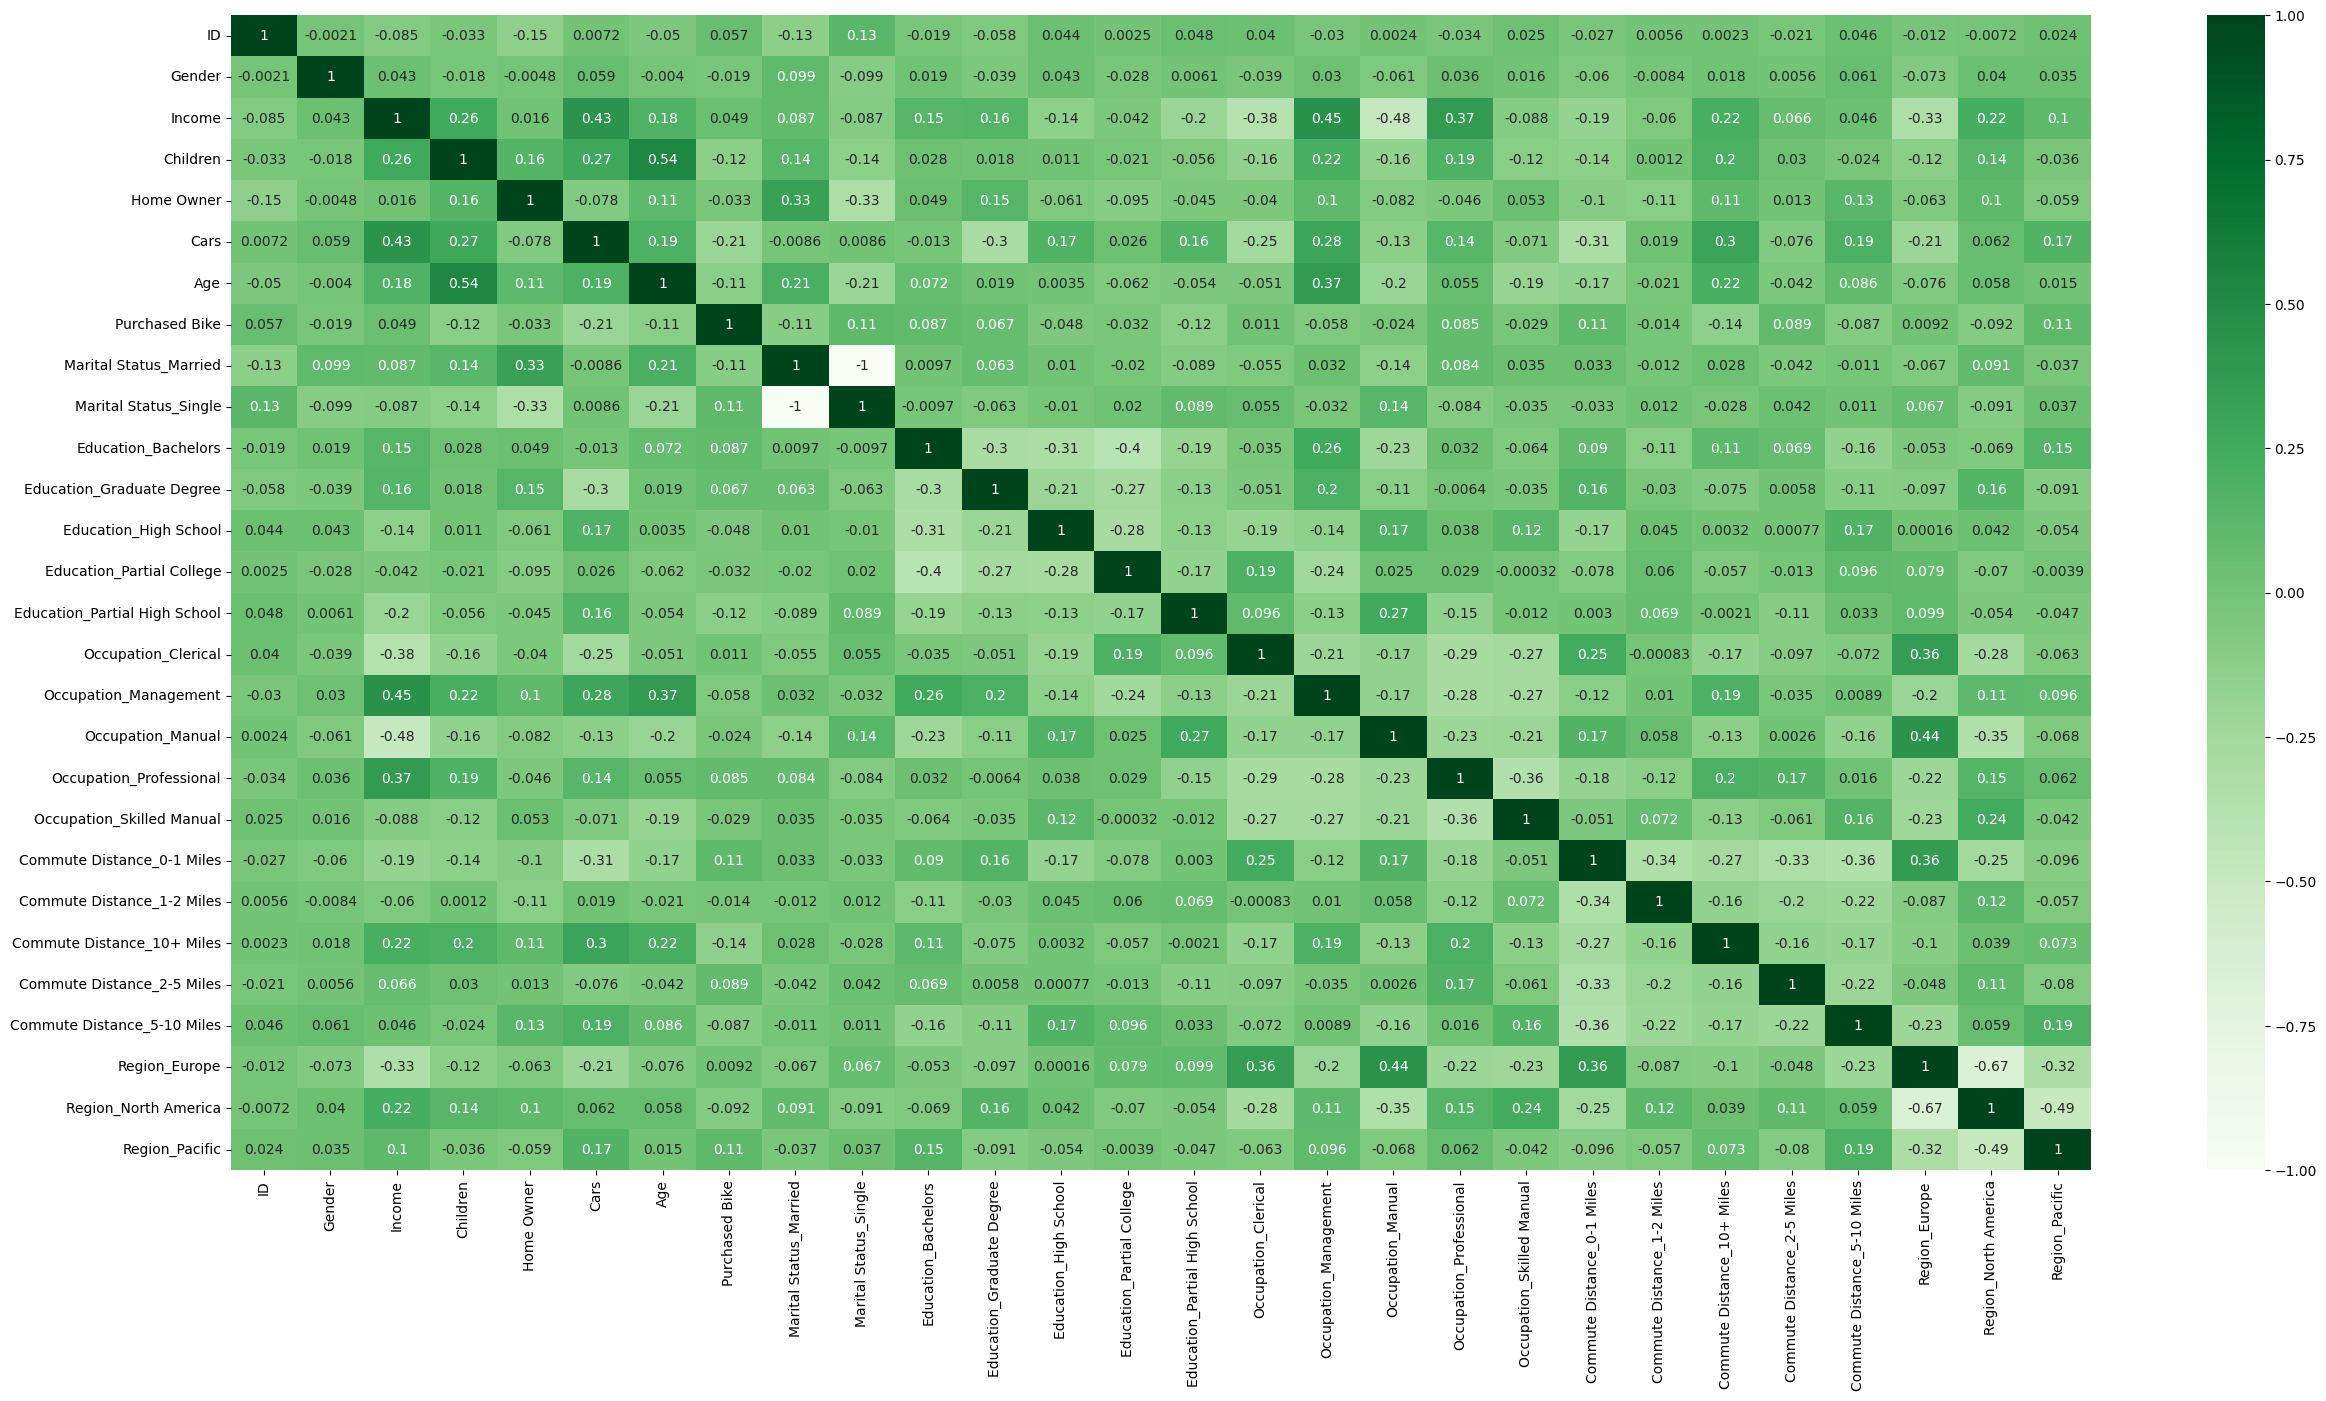

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(data_dummies.corr(), annot=True, cmap="Greens")

## Regularization

In [ ]:
X = data_dummies.drop('Purchased Bike', axis=1)
y = data_dummies['Purchased Bike']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.4038008 , -1.00632251, -0.51585252, ...,  1.52599847,
        -1.02123379, -0.48286708],
       [ 0.77413366,  0.99371722, -0.8402195 , ...,  1.52599847,
        -1.02123379, -0.48286708],
       [-1.08848706,  0.99371722,  0.78161538, ...,  1.52599847,
        -1.02123379, -0.48286708],
       ...,
       [ 1.63041398,  0.99371722,  0.45724841, ..., -0.65530865,
         0.97920771, -0.48286708],
       [-0.0592625 ,  0.99371722,  1.43034933, ..., -0.65530865,
         0.97920771, -0.48286708],
       [-1.47414146,  0.99371722,  0.13288143, ..., -0.65530865,
         0.97920771, -0.48286708]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5, test_size=0.2)

# RNN model

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(SimpleRNN(32, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(SimpleRNN(16, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(SimpleRNN(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

model.compile(loss="binary_crossentropy", metrics='accuracy', optimizer='adam')
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, y_train, epochs=200, batch_size=512, callbacks=[earlystopping], validation_data=[X_test, y_test])

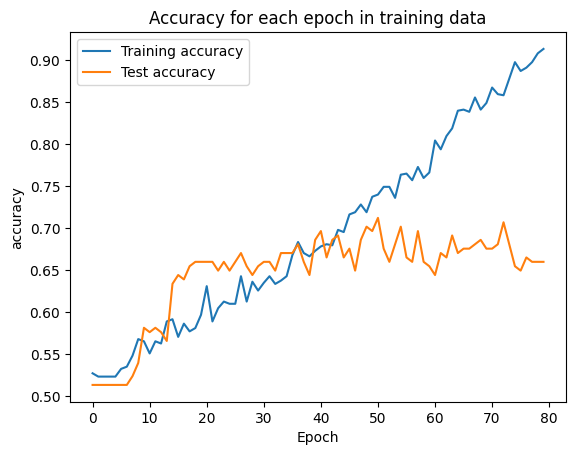

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'], loc='upper left')
plt.title('Accuracy for each epoch in training data')
plt.show()